In [1]:
import numpy as np

import cv2 as cv
import matplotlib.pyplot as plt
import math

#my functions
from Plot import plot_cv, plot_img

In [2]:
path = '../../../Data/coins.jpg'
img_rgb = cv.imread(path, cv.IMREAD_COLOR_RGB)
img = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_rgb.shape, img.shape

((375, 500, 3), (375, 500))

In [3]:
def hough_circles(img, radii):
    """
    radii: radius eval
    """
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray, 100, 200)
    h, w = edges.shape
    
    accumulator = np.zeros((h, w, len(radii)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(edges)
    
    for r_idx, r in enumerate(radii):
        for x, y in zip(x_idxs, y_idxs):
            for theta in range(0, 360, 5): 
                a = int(x - r * math.cos(math.radians(theta)))
                b = int(y - r * math.sin(math.radians(theta)))
                if 0 <= a < w and 0 <= b < h:
                    accumulator[b, a, r_idx] += 1
                    
    return accumulator

In [4]:
r = [20, 30, 40]
accumulator = hough_circles(img_rgb, radii = r)

In [ ]:

def draw_hough_circles(img, accumulator, radii, threshold=100):
    """
    radii: radius eval
    """
    img_out = img.copy()
    h, w, _ = accumulator.shape
    circles = []

    for r_idx, r in enumerate(radii):
        layer = accumulator[:, :, r_idx]
        peaks = np.argwhere(layer > threshold)
        for (y, x) in peaks:
            circles.append((x, y, r))

    print(f"Detected {len(circles)} circles with threshold={threshold}")


    for (x, y, r) in circles:
        cv.circle(img_out, (x, y), r, (0, 0, 255), 2, cv.LINE_AA)
        cv.circle(img_out, (x, y), 2, (0, 255, 0), -1)  #center

    return img_out, circles

Detected 83 circles with threshold=21


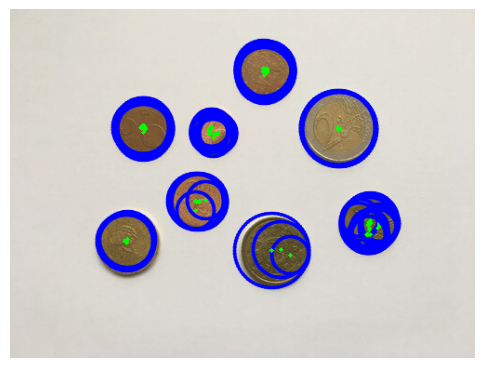

In [ ]:
circles_img, circles = draw_hough_circles(img_rgb, accumulator, radii = r, threshold = 21)
plot_img(circles_img)

In [7]:

def show_accumulator(accumulator, radii):
    r_len = len(radii)
    fig, axes = plt.subplots(1, r_len, figsize=(15, 5))
    
    for i in range(r_len):
        acc_norm_i = cv.normalize(accumulator[:, :, i], None, 0, 255, cv.NORM_MINMAX) 
        axes[i].imshow(acc_norm_i, cmap='hot')
        axes[i].set_title(f"Accumulator for r={radii[i]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

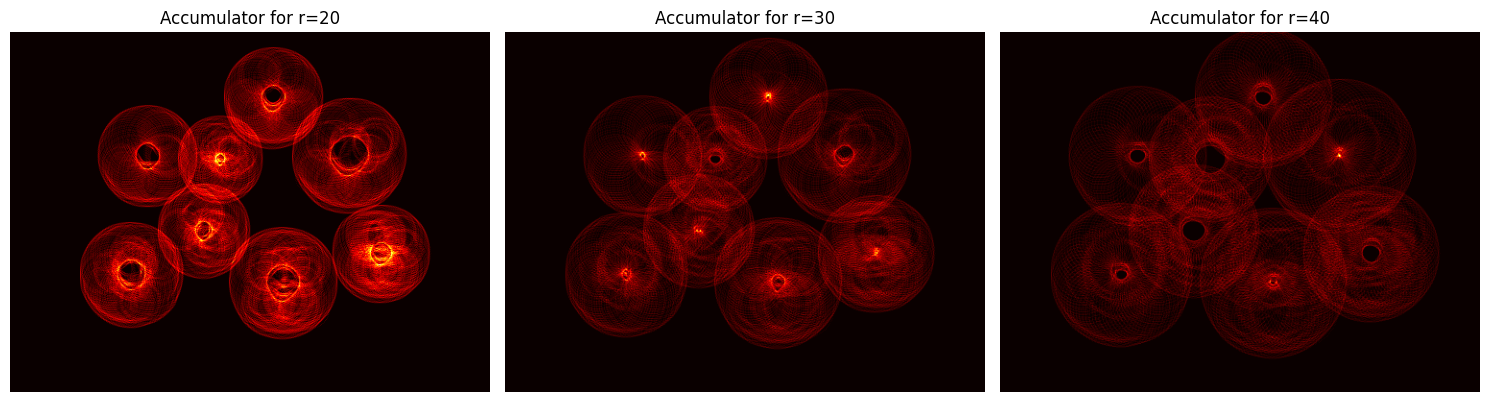

In [8]:
show_accumulator(accumulator, r)